# K Means Clustering 

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [2]:
# Import Packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Read the Dataframe
dataframe = pd.read_csv("/Users/devangpapinwar/Downloads/Refactored_Py_DS_ML_Bootcamp-master/17-K-Means-Clustering/College_Data")

In [4]:
# Get Dataframe Info
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
# Top 10 elements
dataframe.head(10)

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   
7                Albion College     Yes  1899    1720     489         37   
8              Albright College     Yes  1038     839     227         30   
9     Alderson-Broaddus College     Yes   582     498     172         21   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   
5         62          678           41     13500        3335    500       675   
6         45          416          230     13290        5720    500      1500   
7         68         1594           32     13868        4826    450       850   
8         63          973          306     15595        4400    300       500   
9         44          799           78     10468        3380    660      1800   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15  
5   67        73        9.4           11    9727         55  
6   90        93       11.5           26    8861         63  
7   89       100       13.7           37   11487         73  
8   79        84       11.3           23   11644         80  
9   40        41       11.5           15    8991         52

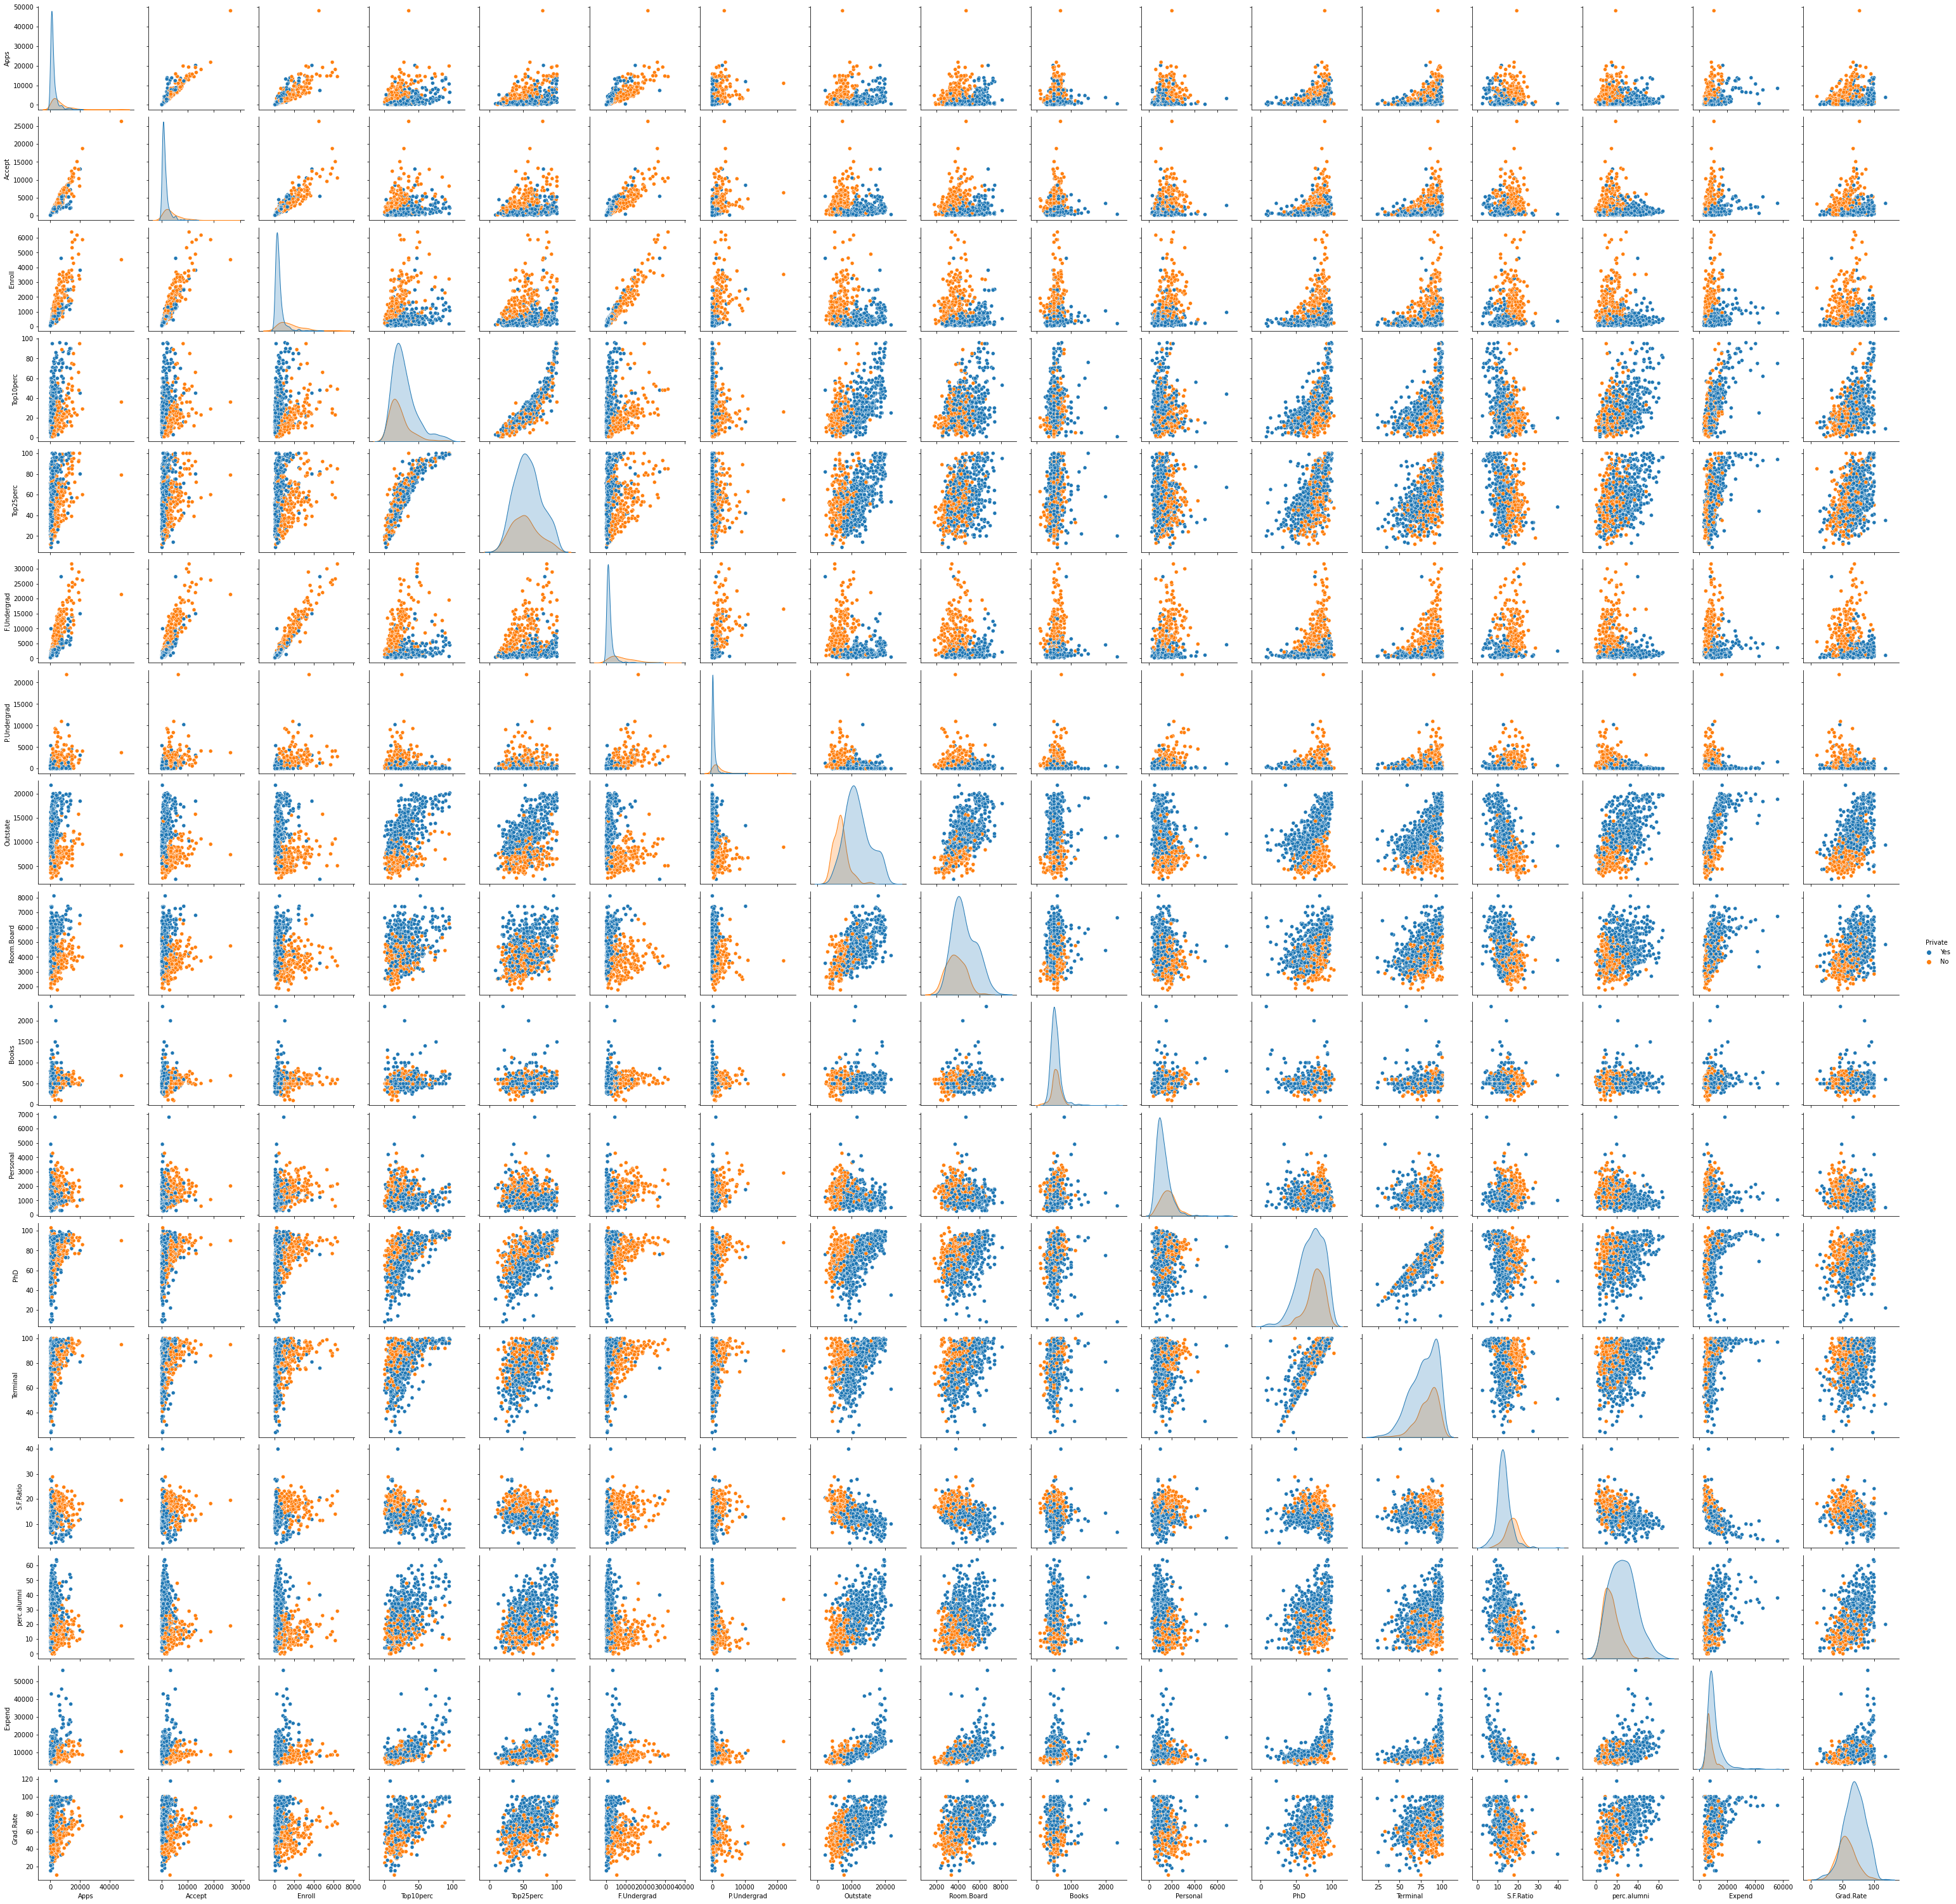

In [6]:
# Pairwise Relationship of the Numerical Data present in the Dataframe
sb.pairplot(dataframe , hue = "Private")

In [7]:
# Gets Column Labels
dataframe.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

<AxesSubplot:xlabel='Grad.Rate', ylabel='Room.Board'>

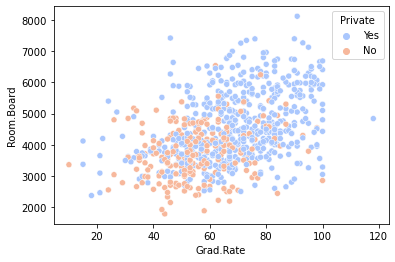

In [8]:
# Relationship between Grad.Rate and Room.Board with whether they are private or public universities
sb.scatterplot(data= dataframe, x= "Grad.Rate" , y= "Room.Board" ,hue = "Private",palette='coolwarm')

<AxesSubplot:xlabel='Accept', ylabel='Enroll'>

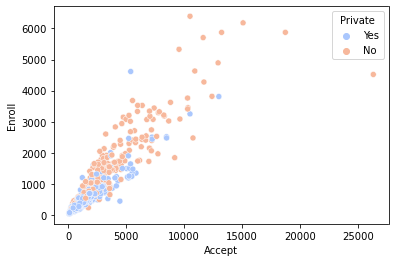

In [9]:
# Relationship between Accept and Enrolled candidates with whether they are private or public universities
sb.scatterplot(data= dataframe , x = "Accept" , y = "Enroll" , hue = "Private",palette='coolwarm')

<AxesSubplot:xlabel='F.Undergrad', ylabel='Outstate'>

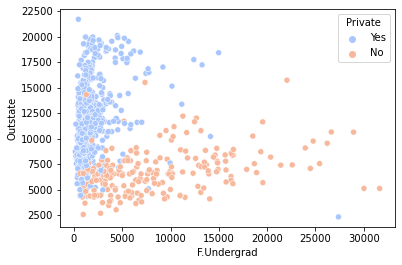

In [10]:
# Relationship between Fulltime Undergrads and Outstates with whether they are private or public universities
sb.scatterplot(data= dataframe , x = "F.Undergrad" , y = "Outstate" , hue= "Private",palette='coolwarm')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


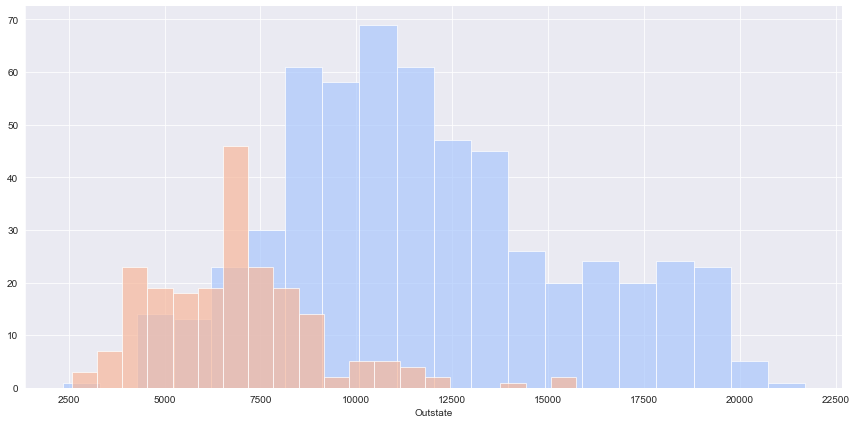

In [11]:
# Histogram repr of Outstate students with private or public uni hue
sb.set_style('darkgrid')
g = sb.FacetGrid(dataframe,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


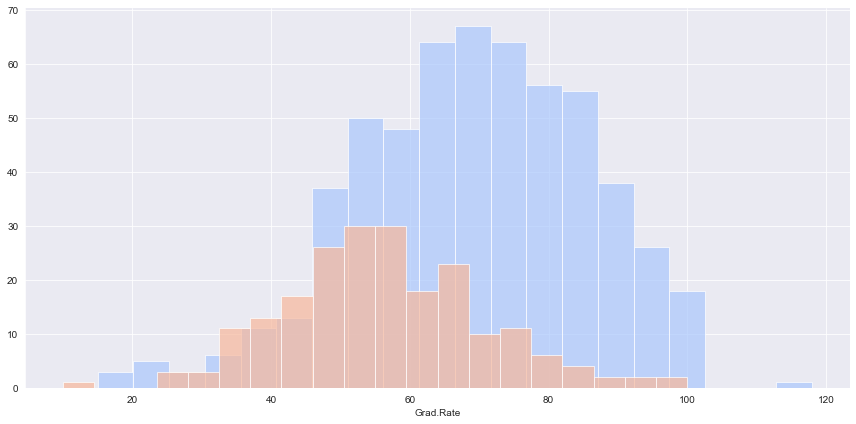

In [12]:
# Histogram repr of Graduation Rate with private or public uni hue
sb.set_style('darkgrid')
g = sb.FacetGrid(dataframe,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [13]:
# Make the Grad Rate of the college to 100
dataframe[dataframe["Grad.Rate"] >= 118] = 100
dataframe[dataframe["Grad.Rate"] >= 100]

Unnamed: 0 Private   Apps  Accept  Enroll  \
16                   Amherst College     Yes   4302     992     418   
95                               100     100    100     100     100   
126      College of Mount St. Joseph     Yes    798     620     238   
238               Grove City College     Yes   2491    1110     573   
250               Harvard University     Yes  13865    2165    1606   
251              Harvey Mudd College     Yes   1377     572     178   
317               Lindenwood College     Yes    810     484     356   
377  Missouri Southern State College      No   1576    1326     913   
511           Santa Clara University     Yes   4019    2779     888   
522                    Siena College     Yes   2961    1932     628   
668           University of Richmond     Yes   5892    2718     756   

     Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  \
16          83         96         1593            5     19760        5300   
95         100        100          100          100       100         100   
126         14         41         1165         1232      9800        4430   
238         57         88         2213           35      5224        3048   
250         90        100         6862          320     18485        6410   
251         95        100          654            5     17230        6690   
317          6         33         2155          191      9200        4800   
377         13         50         3689         2200      3840        2852   
511         40         73         3891          128     13584        5928   
522         24         68         2669          616     10800        5100   
668         46         72         2854          594     14500        3285   

     Books  Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
16     660      1598   93        98        8.4           63   21424        100  
95     100       100  100       100      100.0          100     100        100  
126    400      1150   46        46       11.1           35    6889        100  
238    525       350   65        65       18.4           18    4957        100  
250    500      1920   97        97        9.9           52   37219        100  
251    700       900  100       100        8.2           46   21569        100  
317   1000      4200   65        85       24.1            9    3480        100  
377    200       400   52        54       20.3            9    4172        100  
511    630      1278   88        92       13.9           19   10872        100  
522    575      1090   71        82       14.1           42    8189        100  
668    700      1125   75        89       11.7           32   11984        100

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


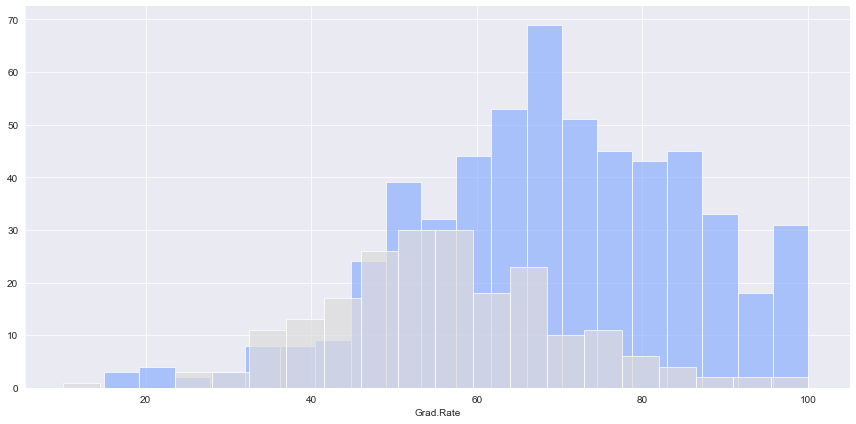

In [14]:
# Now the Grad Rate is perfect
sb.set_style('darkgrid')
g = sb.FacetGrid(dataframe,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [19]:
dataframe.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [29]:
dataframe = dataframe.drop("Unnamed: 0",axis=1)

In [30]:
dataframe.head()

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [31]:
# Instantiate KMeans with 2 clusters and fit the dataframe except the private column
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(dataframe.drop('Private',axis=1))

KMeans(n_clusters=2)

In [32]:
# Number of centers
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.80763378e+03, 1.28218386e+03, 4.90406577e+02, 2.54454410e+01,
        5.35680120e+01, 2.18718834e+03, 5.95590433e+02, 1.03818311e+04,
        4.30427952e+03, 5.41234679e+02, 1.27973842e+03, 7.05590433e+01,
        7.79043348e+01, 1.42278027e+01, 2.32944694e+01, 8.92069058e+03,
        6.50926756e+01]])

# Evaluation :
Normally we dont evaluate or cant evaluate but in this case we have the labels so we would like to check the accuracy of our model

In [ ]:
def convert(cluster):
    if cluster == "Yes":
        return int(1)
    else:
        return int(0)

In [ ]:
# Create a new binary column on whether the uni is private or not 
dataframe["Cluster"] = dataframe["Private"].apply(convert) 

In [ ]:
# dataframe["Cluster"].astype(int)
dataframe.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Cluster  
0   70        78       18.1           12    7041         60        1  
1   29        30       12.2           16   10527         56        1  
2   53        66       12.9           30    8735         54        1  
3   92        97        7.7           37   19016         59        1  
4   76        72       11.9            2   10922         15        1

In [ ]:
# Evaluation Metrics
from sklearn.metrics import classification_report , confusion_matrix

print(confusion_matrix(dataframe['Cluster'],kmeans.labels_))
print(classification_report(dataframe['Cluster'],kmeans.labels_))

[[139  74]
 [530  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.32       213
           1       0.31      0.06      0.10       564

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



# Conclusion :
Considering a Fact that it is a UnSupervised Algorithm it actually performs well